In [139]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### 0.Read Data

In [140]:
df = pd.read_csv('../data/SpotifyFeatures.csv')

In [141]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [142]:
print(df.columns)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [143]:
# Check for missing values
print("Missing values before removal:")
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Check for missing values after removal
print("\nMissing values after row removal:")
print(df.isnull().sum())

# Print the cleaned DataFrame
print("\nCleaned DataFrame (rows removed):")
df

Missing values before removal:
genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Missing values after row removal:
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Cleaned DataFrame (rows removed):


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [144]:
df.duplicated().sum()

0

Check if there are the same songs for same artist double in the dataset with different genre

In [145]:
# Contar géneros únicos para cada canción y artista
canciones_con_multigeneros = df.groupby(['track_name', 'artist_name'])['genre'].nunique()

#Filtrar las canciones con más de un género
canciones_con_multigeneros = canciones_con_multigeneros[canciones_con_multigeneros > 1]

# Imprimir el resultado
print(canciones_con_multigeneros)

track_name                           artist_name         
"42" - From SR3MM                    Rae Sremmurd            2
"99"                                 Barns Courtney          3
"A Far Green Country"                Howard Shore            2
"Eternal"                            Bone Thugs-N-Harmony    2
"For Frodo" - feat. Ben del Maestro  Howard Shore            2
                                                            ..
風のとおり道                               Joe Hisaishi            3
風の伝説                                 Joe Hisaishi            2
눈,코,입(Eyes, Noes, Lips)              TAEYANG                 2
달리                                   Hyolyn                  2
모든 날, 모든 순간 Every day, Every Moment  Paul Kim                2
Name: genre, Length: 35258, dtype: int64


In [146]:
# Filtrar por el nombre de la canción específica
nombre_cancion = '"For Frodo" - feat. Ben del Maestro'  # Sustituye con el nombre de la canción que buscas
filas_cancion = df[df['track_name'] == nombre_cancion]

# Imprimir todas las celdas para esa canción
filas_cancion

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
125707,Classical,Howard Shore,"""For Frodo"" - feat. Ben del Maestro",4g7Ithd2Fpoupsjs5sJxeR,40,0.547,0.164,196867,0.352,0.909,E,0.0828,-14.595,Minor,0.0369,130.973,4/4,0.135
200002,Soundtrack,Howard Shore,"""For Frodo"" - feat. Ben del Maestro",4g7Ithd2Fpoupsjs5sJxeR,40,0.547,0.164,196867,0.352,0.909,E,0.0828,-14.595,Minor,0.0369,130.973,4/4,0.135


In [147]:
# Contar cuántas veces aparece cada combinación de track_id y artist_name 
conteo = df.groupby(['track_id', 'artist_name']).size().reset_index(name='Repeticiones') 
# Filtrar solo las que tienen más de una repetición 
repetidos = conteo[conteo['Repeticiones'] > 1] 
print(repetidos)

#Encontrar los valores duplicados en track_id y artist_name 
duplicados = df.duplicated(subset=['track_id', 'artist_name'], keep=False) 
# Filtrar solo un registro por cada combinación de track_id y artist_name 
df_unicos = df[duplicados].drop_duplicates(subset=['track_id', 'artist_name']) 
print(df_unicos)

                      track_id              artist_name  Repeticiones
4       000xQL6tZNLJzIrtIgxqSl                     ZAYN             2
12      001gDjxhKGDSx4sMMAgS9R              Young Tribe             2
13      001ifh9Zkyc5DhK7AGQRtK           Alabama Shakes             2
15      002PgfoyfrOGiKch4EW8Wm              Alan Menken             2
16      002QT7AS6h1LAF5dla8D92              Young Dolph             2
...                        ...                      ...           ...
176777  7zxLkZbUxITHabPzGN8Xgc                boy pablo             2
176778  7zxRMhXxJMQCeDDg0rKAVo                      NAV             3
176780  7zy2ezQByCeFcaDtsxt77o              Bay Faction             2
176781  7zyJ2g9o0nVOBbDavVveCl  Five Finger Death Punch             2
176790  7zzZmpw8L66ZPjH1M6qmOs               Moonstar88             2

[35122 rows x 3 columns]
          genre       artist_name                                  track_name  \
135         R&B     Mary J. Blige                  Be

In [148]:
df=df_unicos

<Axes: xlabel='popularity', ylabel='Count'>

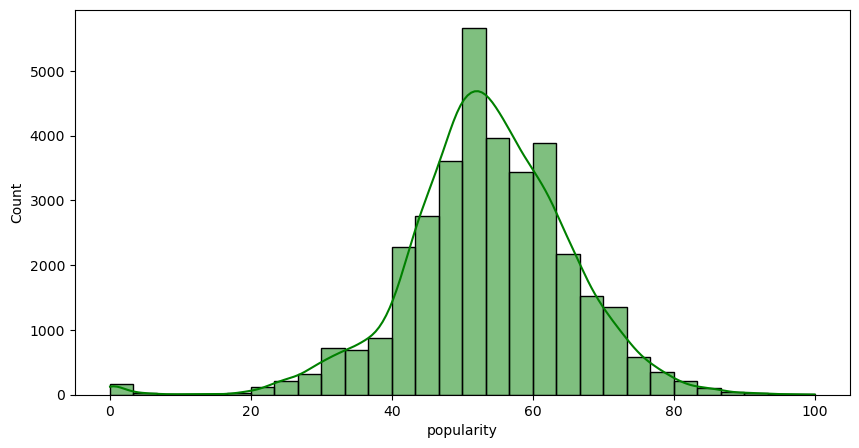

In [149]:
# Distribution of the popularity column = target variable
plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], kde=True, bins=30, color='green')

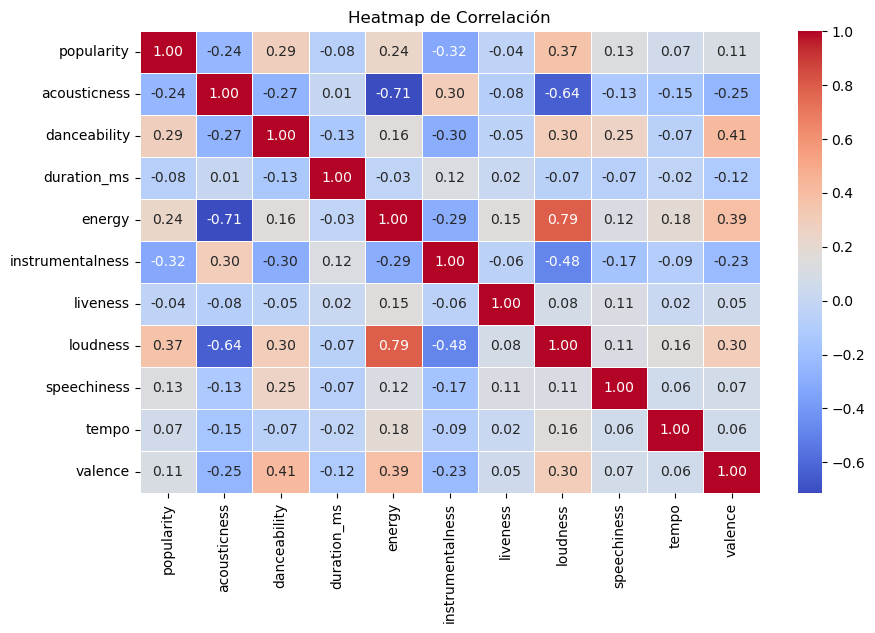

In [150]:
df_numeric = df.select_dtypes(include=['number'])  # Filtrar solo columnas numéricas
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

### 1. Romoving columns that we are not going to use

In [151]:
df= df.drop(columns=['genre', 'artist_name', 'track_name', 'track_id'])

### 2. Transforming to data

Transform categorical variables: key, mode and time signature from text to numbers using one-hot-encoding. We also define popularity as a binary variable: "popular" and "no popular"

(array([3444., 4133., 2920., 2939., 2560., 3729., 2499., 2273., 3948.,
        3240., 2400., 1037.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

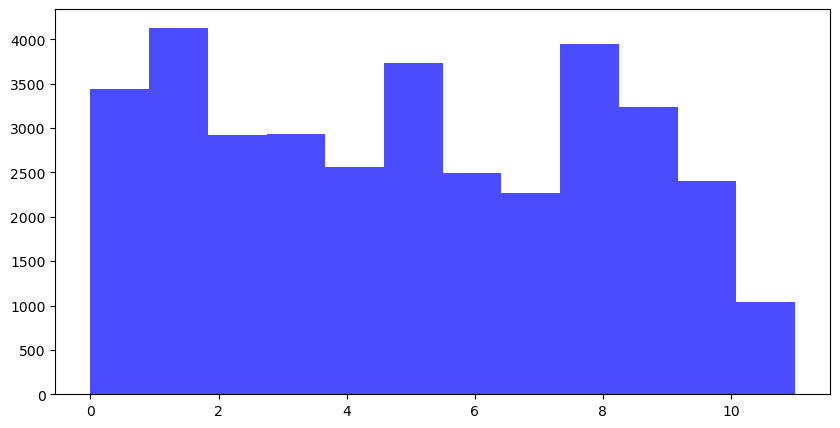

In [152]:
# Get unique values from the 'key' column
list_of_keys = df['key'].unique()

# Create a dictionary to map each key to a number
key_mapping = {key: i for i, key in enumerate(list_of_keys)}

# Replace values in the 'key' column
df['key'] = df['key'].map(key_mapping)

#Visualize the distribution of the 'key' column
plt.figure(figsize=(10,5))
plt.hist(df['key'], bins=12, color='blue', alpha=0.7)

(array([12950.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 22172.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 <BarContainer object of 12 artists>)

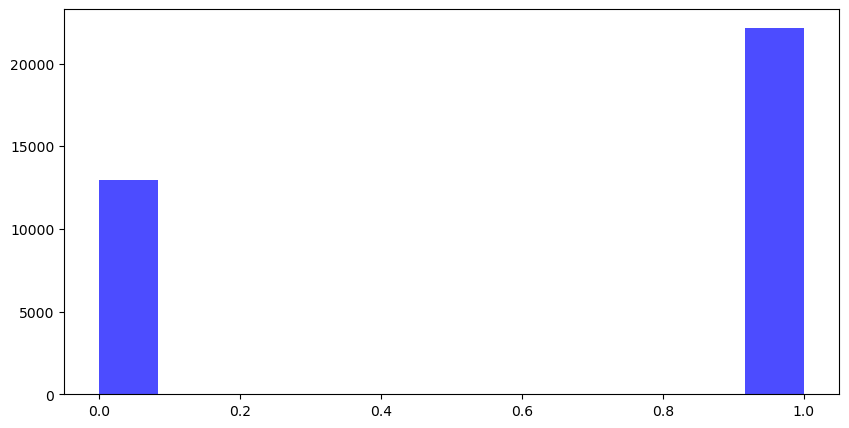

In [153]:
#Replace values in  the 'mode' column
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
#Visualize the distribution of the 'mode' column
plt.figure(figsize=(10,5))
plt.hist(df['mode'], bins=12, color='blue', alpha=0.7)

In [154]:
# Calculate the quartiles of the 'popularity' column
quartiles = df['popularity'].quantile([0.25, 0.5, 0.75])

# Display the results
print(quartiles)

0.25    47.0
0.50    54.0
0.75    61.0
Name: popularity, dtype: float64


In [155]:
# Get unique values from the 'time_signature' column
list_of_time_signatures = df['time_signature'].unique()

# Create a dictionary to map each unique time signature to a number
time_signature_mapping = {ts: i for i, ts in enumerate(list_of_time_signatures)}

# Replace values in the 'time_signature' column
df['time_signature'] = df['time_signature'].map(time_signature_mapping)

For simplicity and using binary classification, we define as the top 25% popular songs as "popular", and the bottom 75% popular songs as "not popular".

In [156]:
# Convert 'popularity' to binary values (0 if <= 55, 1 if > 55)
df['popularity'] = (df['popularity'] >= 55).astype(int)

In [157]:
print(df["popularity"].value_counts())

popularity
0    18859
1    16263
Name: count, dtype: int64


In [158]:
# Filtrar y mostrar todas las filas donde la columna "popularity" es igual a 1
filtered_df = df[df["popularity"] == 1]

# Mostrar el dataframe filtrado
print(filtered_df)

        popularity  acousticness  danceability  duration_ms  energy  \
135              1        0.0830         0.724       246333   0.689   
136              1        0.3230         0.685       186467   0.610   
137              1        0.0675         0.762       199520   0.520   
138              1        0.3600         0.563       240597   0.366   
139              1        0.5960         0.653       213947   0.621   
...            ...           ...           ...          ...     ...   
213663           1        0.5120         0.750       174667   0.451   
213681           1        0.8080         0.616       253293   0.217   
214554           1        0.4580         0.400       109707   0.818   
214786           1        0.1690         0.648       225667   0.656   
215120           1        0.8320         0.377       172400   0.626   

        instrumentalness  key  liveness  loudness mode  speechiness    tempo  \
135             0.000000    0    0.3040    -5.922    0       0.1350

### 3. Perform Train Test Split

In [160]:
features = df.drop(columns=["popularity","loudness"], axis = 1)
target = df["popularity"]

In [161]:
features.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [162]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#### 3.1 Normalization

In [163]:
normalizer = MinMaxScaler()

In [164]:
#Fit to our training data
normalizer.fit(X_train)

MinMaxScaler()

In [165]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [166]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
0,0.406626,0.819121,0.055523,0.611215,0.823944,0.000000,0.085156,1.0,0.226203,0.254271,0.0,0.721493
1,0.078111,0.782515,0.027463,0.549089,0.000000,0.000000,0.360065,1.0,0.281243,0.393367,0.0,0.378406
2,0.002629,0.701766,0.071937,0.693381,0.012877,0.636364,0.121102,1.0,0.037125,0.377800,0.0,0.292634
3,0.253011,0.679156,0.044121,0.615223,0.000020,0.363636,0.167679,0.0,0.008850,0.579056,0.0,0.414733
4,0.004768,0.553187,0.049429,0.743482,0.000000,0.000000,0.330701,1.0,0.022448,0.296577,0.0,0.265388


In [167]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
0,0.001826,0.491817,0.058442,0.865729,0.000074,0.000000,0.096800,1.0,0.027412,0.644330,0.0,0.234107
1,0.000034,0.454134,0.032841,0.941883,0.031288,0.727273,0.071183,1.0,0.061947,0.750854,0.0,0.739657
2,0.009547,0.581180,0.064882,0.955911,0.000029,0.000000,0.116039,1.0,0.062271,0.356018,0.0,0.237134
3,0.020882,0.635013,0.033451,0.809615,0.000006,0.000000,0.071385,1.0,0.021153,0.589950,0.0,0.508577
4,0.299196,0.378768,0.066678,0.468927,0.000012,0.272727,0.030579,1.0,0.035506,0.772429,0.0,0.479314


### 4. Model Selection

Random Forest - We choose to try this because it's the model with best results in other prior analysis

In [168]:
#Inicialize Random Forest Classifier
forest = RandomForestClassifier()

In [169]:
#Training the model
forest.fit(X_train_norm, y_train)

RandomForestClassifier()

In [ ]:
#Evaluate Random Forest Regressor
y_pred_rf = forest.predict(X_test_norm)
# classification metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_true, y_scores):
    """
    Dibuja la curva ROC y devuelve la puntuación AUC.
    Parámetros:
    - y_true: array-like, valores reales (0 o 1).
    - y_scores: array-like, probabilidades predichas para la clase positiva (1).
    Retorna:
    - roc_auc: float, área bajo la curva ROC.
    """
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    return roc_auc

plot_roc_curve(y_test, y_pred_rf)